<a href="https://colab.research.google.com/github/ajeetranaut/Assignment/blob/master/Lending_Club_Loan_Data_Analysis_Project_2_ajeet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lending Club Loan Data Analysis
Project 2 

DESCRIPTION

Create a model that predicts whether or not a loan will be default using the historical data.

Problem Statement:  

For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using the historical data from 2007 to 2015, you have to build a deep learning model to predict the chance of default for future loans. As you will see later this dataset is highly imbalanced and includes a lot of features that make this problem more challenging.

Domain: Finance

Analysis to be done: Perform data preprocessing and build a deep learning prediction model. 

Content: 

Dataset columns and definition:

 

credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

installment: The monthly installments owed by the borrower if the loan is funded.

log.annual.inc: The natural log of the self-reported annual income of the borrower.

dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

fico: The FICO credit score of the borrower.

days.with.cr.line: The number of days the borrower has had a credit line.

revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.

delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

 

Steps to perform:

Perform exploratory data analysis and feature engineering and then apply feature engineering. Follow up with a deep learning model to predict whether or not the loan will be default using the historical data.

Tasks:

1.     Feature Transformation

Transform categorical values into numerical values (discrete)

2.     Exploratory data analysis of different factors of the dataset.

3.     Additional Feature Engineering

You will check the correlation between features and will drop those features which have a strong correlation

This will help reduce the number of features and will leave you with the most relevant features

4.     Modeling

After applying EDA and feature engineering, you are now ready to build the predictive models

In this part, you will create a deep learning model using Keras with Tensorflow backend

To download the data sets click here 

In [ ]:

# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
from pickle import dump, load

%matplotlib inline

In [ ]:
import zipfile
from google.colab import drive

drive.mount('/content/drive/')

zip_ref = zipfile.ZipFile("/content/1585898503_datasets.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

Mounted at /content/drive/


In [ ]:
path_1='/tmp/input.csv'
path_2='/tmp/loan_data.csv'
path_3='/tmp/output.csv'

In [ ]:
input=pd.read_csv(path_1)
input.head()

,1,0.1189,829.1,11.35040654,19.48,737,5639.958333,28854,52.1,0,0.1,0.2,0.3,0.4,1.1,0.5,0.6,0.7
0,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0
1,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0
2,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0
3,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0
4,1,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0,1,0,0,0,0


In [ ]:
loan_data=pd.read_csv(path_2)
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
output=pd.read_csv(path_1)
output.head()

,1,0.1189,829.1,11.35040654,19.48,737,5639.958333,28854,52.1,0,0.1,0.2,0.3,0.4,1.1,0.5,0.6,0.7
0,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0
1,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0
2,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0
3,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0
4,1,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0,1,0,0,0,0


In [ ]:
df = pd.read_csv(path_2)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


In [ ]:
df['not.fully.paid'].isnull().mean()
df.groupby('not.fully.paid')['not.fully.paid'].count()/len(df)

not.fully.paid
0    0.839946
1    0.160054
Name: not.fully.paid, dtype: float64

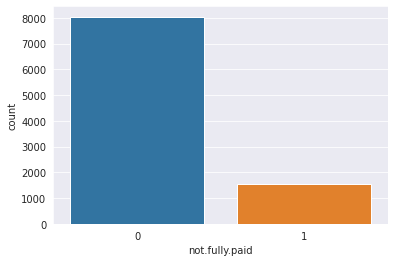

In [ ]:
sns.set_style('darkgrid')
sns.countplot(x='not.fully.paid', data=df)

The above shows, This dataset is highly imbalanced and includes features that make this problem more challenging. If we do model training with this data, the prediction will be biased since the “not.fully.paid =0 “ has 83.9% filled, and only 16% is the “not.fully.paid=1”

Exploratory Data Analysis
Let’s see some data visualization with seaborn and plotting

Random over-sampling:
0    8045
1    8045
Name: not.fully.paid, dtype: int64


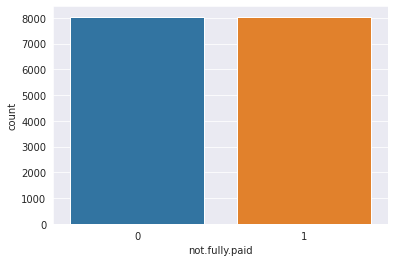

In [ ]:
count_class_0, count_class_1 = df['not.fully.paid'].value_counts()
df_0 = df[df['not.fully.paid'] == 0]
df_1 = df[df['not.fully.paid'] == 1]
df_1_over = df_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_0, df_1_over], axis=0)
print('Random over-sampling:')
print(df_test_over['not.fully.paid'].value_counts())

sns.set_style('darkgrid')
sns.countplot(x='not.fully.paid', data=df_test_over)

Text(0.5, 0, 'FICO')

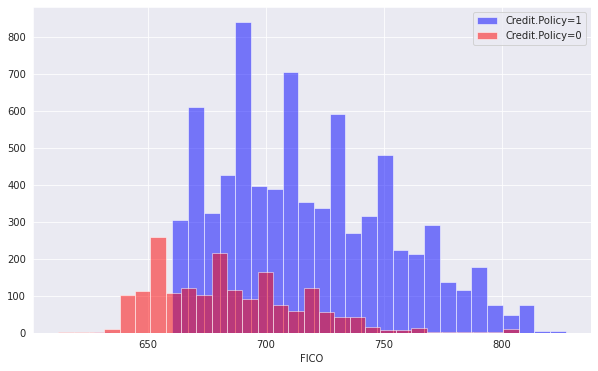

In [ ]:
plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='Credit.Policy=1')
df[df['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

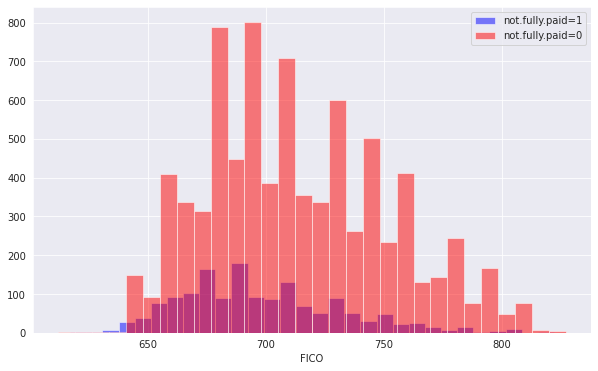

In [ ]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='not.fully.paid=1')
df[df['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

Now, check the dataset group by loan purpose. Create a countplot with the color hue defined by not.fully.paid.

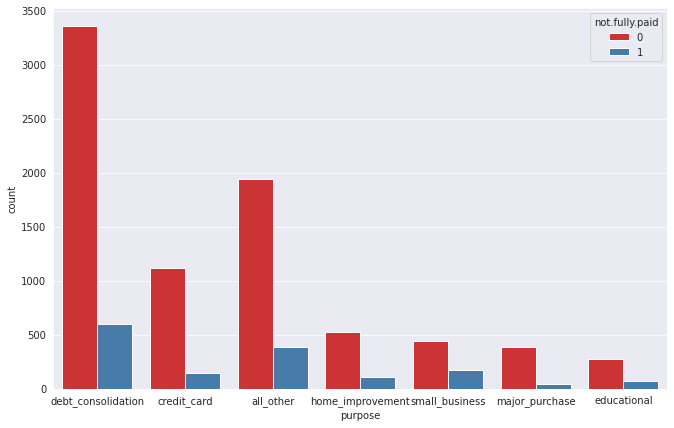

In [ ]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=df,palette='Set1')

The next visual we will pull part of EDA in this dataset is the trend between FICO score and interest rate.

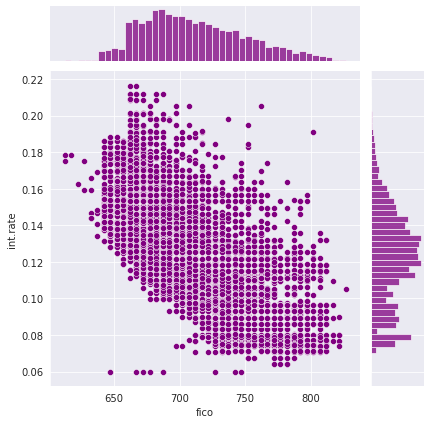

In [ ]:
sns.jointplot(x='fico',y='int.rate',data=df,color='purple')

To compare the trend between not.fully.paid and credit.policy, create seaborn implot.

<Figure size 792x504 with 0 Axes>

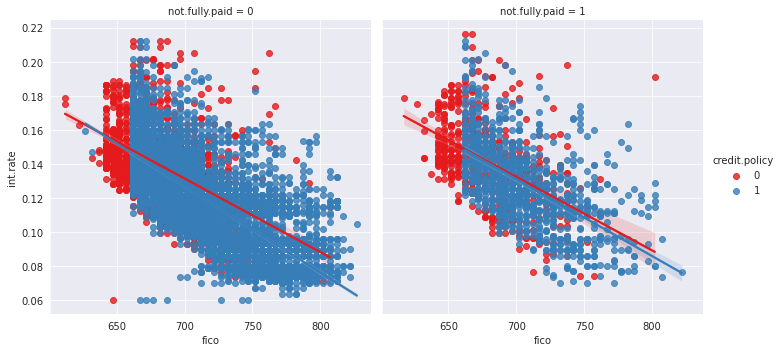

In [ ]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=df,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

The above visuals gave us an idea of how the data is and what we will work with. Nest step is to prepare the data for model training and test as the first step converts the categorical values to numeric. Here in this dataset “purpose” column is a critical data point for the model as per our analysis above, and it is categorical.

In [ ]:
col_fea = ['purpose']
final_data = pd.get_dummies(df_test_over,columns=col_fea,drop_first=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16090 entries, 0 to 677
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               16090 non-null  int64  
 1   int.rate                    16090 non-null  float64
 2   installment                 16090 non-null  float64
 3   log.annual.inc              16090 non-null  float64
 4   dti                         16090 non-null  float64
 5   fico                        16090 non-null  int64  
 6   days.with.cr.line           16090 non-null  float64
 7   revol.bal                   16090 non-null  int64  
 8   revol.util                  16090 non-null  float64
 9   inq.last.6mths              16090 non-null  int64  
 10  delinq.2yrs                 16090 non-null  int64  
 11  pub.rec                     16090 non-null  int64  
 12  not.fully.paid              16090 non-null  int64  
 13  purpose_credit_card         16090

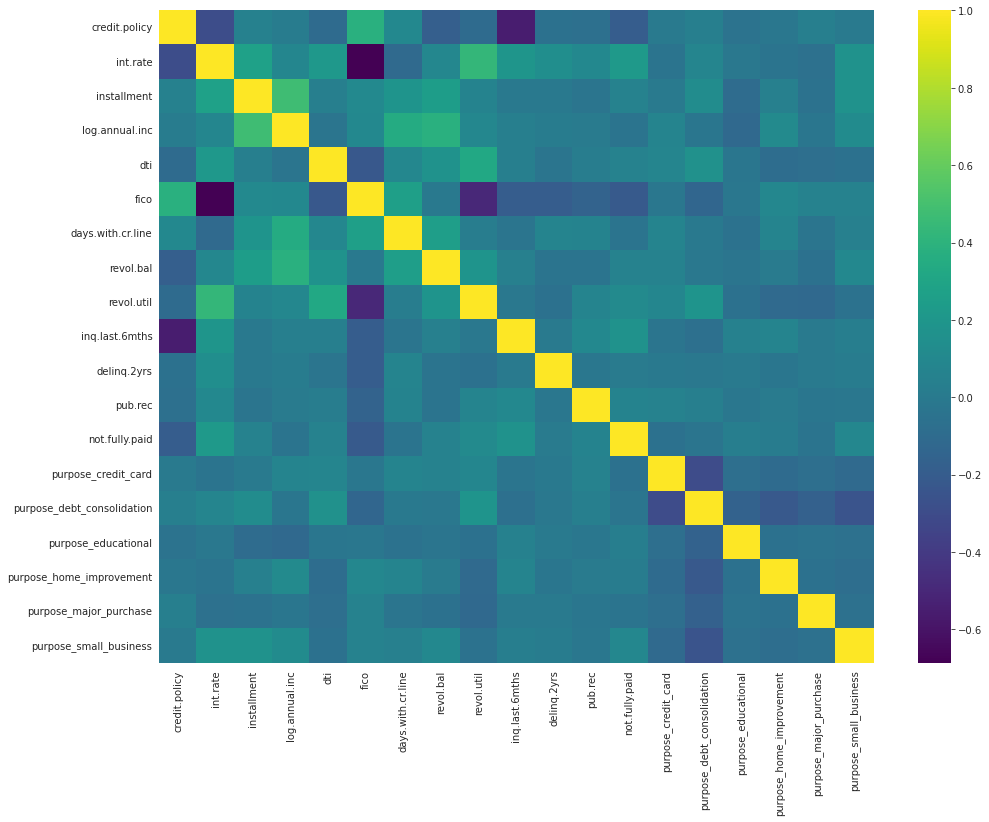

In [ ]:
final_data.corr()
plt.figure(
        figsize=[16,12]
)
sns.heatmap(
        data=final_data.corr(), 
        cmap='viridis', 
        annot=False, 
        fmt='.2g'
)

 After comparing with the feature description again, I decided to drop:’revol.bal’, ‘days.with.cr.line’, ‘installment’, ‘revol.bal’

revol.bal, day.with.cr.line, installment can represent by annual income. revol.util can represent by int.rate.

Modeling
Deep Learning Implementation

 since there are 19 features, I chose the first layer of the neural network with 19 nodes.

In [ ]:
to_train = final_data[final_data['not.fully.paid'].isin([0,1])]
to_pred = final_data[final_data['not.fully.paid'] == 2]

X = to_train.drop('not.fully.paid', axis=1).values
y = to_train['not.fully.paid'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()

model.add(
        Dense(19, activation='relu')
)

model.add(
        Dense(10, activation='relu')
)

model.add(
        Dense(5, activation='relu')
)


model.add(
        Dense(1, activation='sigmoid')
)

model.compile(
        optimizer='adam', 
        loss='binary_crossentropy', 
        metrics=['accuracy']
)

early_stop = EarlyStopping(
        monitor='val_loss', 
        mode='min', 
        verbose=1, 
        patience=25
)

model.fit(
        X_train, 
        y_train, 
        epochs=200, 
        batch_size=256, 
        validation_data=(X_test, y_test),
         callbacks=[early_stop]
)

Epoch 1/200
44/44 [==============================] - 1s 11ms/step - loss: 0.6913 - accuracy: 0.5412 - val_loss: 0.6875 - val_accuracy: 0.5784
Epoch 2/200
44/44 [==============================] - 0s 5ms/step - loss: 0.6823 - accuracy: 0.5832 - val_loss: 0.6772 - val_accuracy: 0.5995
Epoch 3/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6694 - accuracy: 0.6050 - val_loss: 0.6651 - val_accuracy: 0.6039
Epoch 4/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6572 - accuracy: 0.6108 - val_loss: 0.6587 - val_accuracy: 0.5989
Epoch 5/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6510 - accuracy: 0.6120 - val_loss: 0.6564 - val_accuracy: 0.5993
Epoch 6/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6482 - accuracy: 0.6148 - val_loss: 0.6538 - val_accuracy: 0.6016
Epoch 7/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6458 - accuracy: 0.6160 - val_loss: 0.6510 - val_accuracy: 0.6027
Epoch 8/200


Model Evaluation and Validation

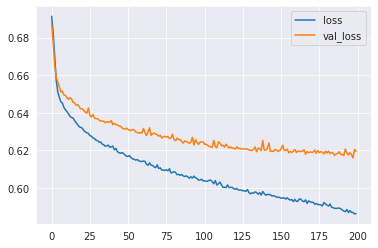

In [ ]:
pd.DataFrame(model.history.history)[['loss','val_loss']].plot()

In [ ]:
predictions = model.predict(X_test)



In [ ]:
predictions

array([[0.5862671 ],
       [0.20250371],
       [0.7969725 ],
       ...,
       [0.47523502],
       [0.7086011 ],
       [0.63032097]], dtype=float32)

In [ ]:
y_pred = (predictions > 0.5)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = (predictions > 0.5)
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred )

[[1416 1021]
 [ 669 1721]]


0.6498860575927077

Model Refinement

In [ ]:
model_new = Sequential()

model_new.add(
        Dense(19, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(10, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(5, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(1, activation='sigmoid')
)

model_new.compile(
        optimizer='adam', 
        loss='binary_crossentropy', 
        metrics=['binary_accuracy']
)


model_new.fit(
        X_train, 
        y_train, 
        epochs=200, 
        batch_size=256, 
        validation_data=(X_test, y_test),
         callbacks=[early_stop]
)

Epoch 1/200
44/44 [==============================] - 2s 11ms/step - loss: 0.6932 - binary_accuracy: 0.5086 - val_loss: 0.6931 - val_binary_accuracy: 0.4993
Epoch 2/200
44/44 [==============================] - 0s 6ms/step - loss: 0.6922 - binary_accuracy: 0.5125 - val_loss: 0.6911 - val_binary_accuracy: 0.5231
Epoch 3/200
44/44 [==============================] - 0s 6ms/step - loss: 0.6845 - binary_accuracy: 0.5475 - val_loss: 0.6757 - val_binary_accuracy: 0.5884
Epoch 4/200
44/44 [==============================] - 0s 6ms/step - loss: 0.6756 - binary_accuracy: 0.5737 - val_loss: 0.6659 - val_binary_accuracy: 0.6085
Epoch 5/200
44/44 [==============================] - 0s 5ms/step - loss: 0.6695 - binary_accuracy: 0.5913 - val_loss: 0.6599 - val_binary_accuracy: 0.6167
Epoch 6/200
44/44 [==============================] - 0s 11ms/step - loss: 0.6660 - binary_accuracy: 0.5908 - val_loss: 0.6578 - val_binary_accuracy: 0.6157
Epoch 7/200
44/44 [==============================] - 1s 13ms/step - 

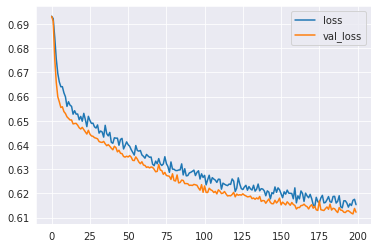

In [ ]:

pd.DataFrame(model_new.history.history)[['loss','val_loss']].plot() 

In [ ]:
predictions_new = (model_new.predict(X_test) >= 0.2).astype('int')

In [ ]:
predictions_new 

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
#y_pred = (predictions_new > 0.5)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = (predictions_new)
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred )

[[ 271 2166]
 [  18 2372]]


0.5475450590428838